**Rationale** Perhaps the most important medium of communicating data-driven insights is through the construction of effective graphs. This assignment is designed for you to practice making some common types of graphs.

[Datasets](https://drive.google.com/open?id=1-oR65kkGk7TIzBtRGXVWhkeU1q7yIc-x&authuser=tul67796%40temple.edu&usp=drive_fs) required

1. [Rent the Runway item fit](https://drive.google.com/open?id=15UtPTWFea2YfU51SRrZJDyM4aI0YXVFU&authuser=tul67796%40temple.edu&usp=drive_fs)
1. [Orange Telecom customer churn](https://drive.google.com/open?id=15eDf_6pamH9GLA1PNMdOlF4YSYHu_zc8&authuser=tul67796%40temple.edu&usp=drive_fs)

# 1. (5 points) Bar Plot - Rent the runway dataset

For categories with at least 100 observations, plot the proportion of reviews that indicated that the item fits using a bar plot.

Answer these questions (see detailed prompt at end of section):

1. Which categories fit the best? Which categories fit the worst?
1. Does this bar plot confirm or reject your prior expectations? Explain.
1. How can you mitigate the fit issues?


**Follow each of the steps below**

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# import the libraries you need: (pandas, matplotlib)
import os
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# specify the folder in your Google MyDrive containing the datasets for this assignment
fpath = 'drive/MyDrive/data'
os.listdir(fpath)

['quebec_biz.csv',
 'quebec_yelp_reviews.csv',
 'quebec_yelp_reviews_filtered.csv',
 'renttherunway_final_data.json',
 'telecom_churn.csv']

In [ ]:
# read in file use read_json(fpath + 'rentherunway_final_data.json', lines = True)
# call the dataframe: rent

rent = pd.read_json(fpath + "/renttherunway_final_data.json", lines=True)

In [ ]:
# preview the first 5 rows the dataset to get a sense of its contents

rent.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [ ]:
rent['fit'].value_counts()

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

In [ ]:
rent['category'].value_counts()

dress           92884
gown            44381
sheath          19316
shift            5365
jumpsuit         5184
                ...  
sweatershirt        4
overcoat            2
sweatpants          2
buttondown          1
crewneck            1
Name: category, Length: 68, dtype: int64

**Double click to edit** 

Fill in the blanks

* In the dataframe `rent`, one row represents the data for one **item_id**

To construct a dataframe that has 1 row = 1 category and summarize the number of rows per category:

* Which variable should you groupby? **category**
* Which variable can you summarize? **fit**
* Which summary function should you use? **max()**

In [ ]:
# execute the groupby to construct the desired dataframe (remember to add .reset_index() to the end of the groupby statement)
# call the resulting dataframe (assign to this variable): count100
count100 = rent.groupby('category')["fit"].max().reset_index()
count100


,category,fit
0,ballgown,small
1,blazer,small
2,blouse,small
3,blouson,small
4,bomber,small
...,...,...
63,trouser,small
64,trousers,small
65,tunic,small
66,turtleneck,small


In [ ]:
# rename the columns to 'category' and 'obs'

count100.rename(columns={"category": "obs"}, inplace=True)
count100

,obs,fit
0,ballgown,small
1,blazer,small
2,blouse,small
3,blouson,small
4,bomber,small
...,...,...
63,trouser,small
64,trousers,small
65,tunic,small
66,turtleneck,small


**Double click to edit**\
Fill in the blanks

To merge `count100` and `rent`, we should use **rent** as the left dataframe and **count100** as the right dataframe.

We should merge on the variable **category**

We will use an inner merge.

In [ ]:
# merge count100 with the rent, reuse the variable rent by replacing it with the result of the merge

rent = rent.merge(count100, how="inner", on="fit")


In [ ]:
# preview rent dataframe to show that there's a new column: "obs"

rent.head()


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",combo
1,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",crewneck
2,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",henley
3,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",overcoat
4,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",sweatpants


In [ ]:
# what are the unique values in fit column? select the fit column and use the .unique() method

rent["fit"].unique()

array(['fit', 'small', 'large'], dtype=object)

In [ ]:
# create a column in rent called 'fit1'

# first initialize the fit1 column where all observations in the column are 0's 
# modify the generic syntax df['column name'] = 0

rent["fit1"] = 0
# select the subset of fit1 column where fit column has the value "fit"
## e.g. select rows where fit column has the value 'fit' and the column 'fit1'
## set these rows of the fit1 column = 1 (modify the syntax df.loc[conditions, 'column name'] = 1)

rent.loc[rent.fit == "fit", "fit1"] = 1

In [ ]:
# sample 20 random rows of the rent dataframe, make sure the fit1 column corresponds
# to the correct rows as indicated by the fit column
# (run the code several times if you don't see any rows that indicate item did not fit (fit1 is 0))

rent.sample(n=20)


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs,fit1
2161544,large,137441,34b,174086,NaN,10.0,wedding,"This dress ran a little big on me, but I had t...",petite,Loved the color of this dress--and it has pock...,dress,"5' 2""",12,34.0,"November 25, 2014",sweatershirt,0
1305225,small,692788,34a,1247623,140lbs,8.0,party,"I got this as my back up dress, didn't end up ...",hourglass,Lovely dress,dress,"5' 6""",20,55.0,"December 9, 2014",blouson,0
2056912,large,772221,32d,472922,125lbs,8.0,wedding,It seemed to run a little big but it worked we...,hourglass,Classy and pretty,dress,"5' 2""",4,30.0,"October 4, 2016",sweatershirt,0
1321542,small,759932,32d,553936,136lbs,4.0,date,Material is very shiny and the waist is very s...,pear,Didn't wear,dress,"5' 4""",12,34.0,"May 25, 2017",tight,0
1462864,small,67078,34b,254960,135lbs,8.0,party,The arms run VERY small and there is no give i...,hourglass,Arms run VERY small! Had to size up because o...,sheath,"5' 4""",12,37.0,"April 29, 2015",print,0
989489,small,774460,NaN,547674,NaN,8.0,wedding,This dress was extremely tight over my hips an...,hourglass,"Elegant and classy, yet trendy - Perfect for a...",dress,"5' 7""",8,30.0,"August 17, 2015",dress,0
331217,fit,840007,36b,136860,175lbs,10.0,wedding,I loved the length of this dress. It was so cl...,athletic,I got so many compliments in this dress.,sheath,"5' 10""",16,38.0,"July 1, 2014",henley,1
2177552,large,845347,34b,2282065,115lbs,4.0,everyday,I rented this to wear during the daytime on a ...,petite,Cute Silhouette but very sheer!,top,"5' 2""",4,29.0,"July 11, 2017",caftan,0
2006413,small,844911,36c,597314,165lbs,4.0,party,This would have fit but I have a wider rib cag...,athletic,I didn't end up wearing this one.,dress,"5' 7""",20,34.0,"April 22, 2017",maxi,0
2254283,large,14227,32d+,149739,145lbs,8.0,party,Large... I think. I have lost a significant am...,pear,"I got tons of compliments, but I had to tape i...",gown,"5' 5""",7,37.0,"January 24, 2017",poncho,0


In [ ]:
# Create a new dataframe, rent100, that is the subset of rows of rent that come from categories with at least 100 observations
# Modify the generic syntax newdf = olddf.loc[condition]
required_columns = []
for category in list(rent["category"].unique()):
  if len(rent.loc[rent.category == category]) >= 100:
    required_columns.append(category)


In [ ]:
rent100 = pd.DataFrame()
for category in required_columns:
  temp = rent.loc[rent.category == category]
  rent100 = pd.concat([rent100, temp])

In [ ]:
rent100

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs,fit1
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",combo,1
1,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",crewneck,1
2,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",henley,1
3,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",overcoat,1
4,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",sweatpants,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209069,small,504320,NaN,2270513,NaN,8.0,everyday,"There really wasn't anything wrong with it, it...",hourglass,It was just meh,for,"5' 7""",20,39.0,"October 24, 2017",trouser,0
1209070,small,504320,NaN,2270513,NaN,8.0,everyday,"There really wasn't anything wrong with it, it...",hourglass,It was just meh,for,"5' 7""",20,39.0,"October 24, 2017",trousers,0
1209071,small,504320,NaN,2270513,NaN,8.0,everyday,"There really wasn't anything wrong with it, it...",hourglass,It was just meh,for,"5' 7""",20,39.0,"October 24, 2017",tunic,0
1209072,small,504320,NaN,2270513,NaN,8.0,everyday,"There really wasn't anything wrong with it, it...",hourglass,It was just meh,for,"5' 7""",20,39.0,"October 24, 2017",turtleneck,0


**Double click to edit** 

To construct a dataframe that has 1 row = 1 category and summarize the proportion of rental reviews that indicate the item from that category fits

* Which variable should you groupby? **category**
* Which variable can you summarize? **fit1**
* Which summary function should you use? **count**

In [ ]:
# execute the groupby
# (remember to add .reset_index() to the end of the groupby statement)
# call the resulting dataframe (assign to this variable): fit100 
fit100 = rent.groupby("category")["fit1"].count().reset_index()



In [ ]:
# display the fit100 dataframe, make sure it contains the expected information
# e.g. category and proportion of fit

fit100


,category,fit1
0,ballgown,157
1,blazer,7902
2,blouse,6717
3,blouson,129
4,bomber,1664
...,...,...
63,trouser,969
64,trousers,325
65,tunic,1363
66,turtleneck,265


In [ ]:
# sort this fit100 dataframe from smallest to largest proportion
# be sure to specify the inplace = True option to alter the dataframe
# we need this step to make the resulting bar plot ordered from shortest 
# to tallest bar
# modify the generic syntax df.sort_values(by = 'sort column name', inplace = True)

fit100.sort_values(by="fit1", inplace=True)

In [ ]:
# display the resulting dataframe again to make sure it is properly sorted
fit100


,category,fit1
12,crewneck,5
36,overcoat,10
55,sweatpants,10
5,buttondown,11
54,sweatershirt,26
...,...,...
26,jumpsuit,61380
46,shift,70059
45,sheath,253635
20,gown,471346


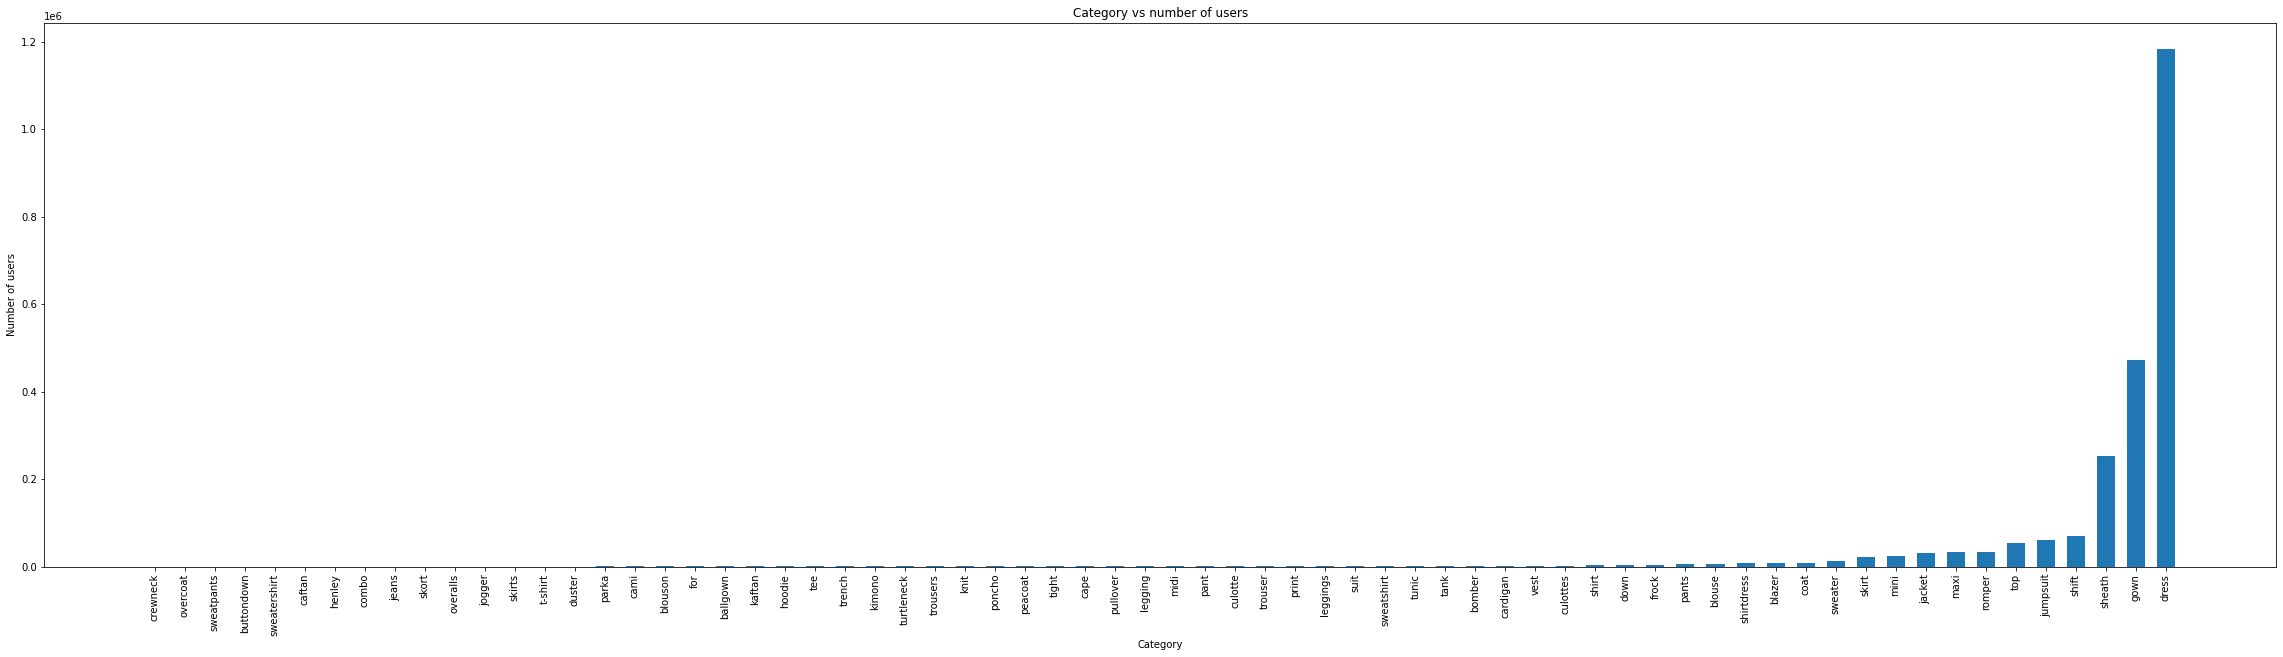

In [ ]:
# construct the bar plot
# make the bar plot easy to read by:
# adjust the figure size
# x-axis labels degrees
# other appearance parameters

# MAKE SURE TO LABEL YOUR AXES
plt.figure(figsize=(40, 10))
plt.bar(x=fit100.category, height=fit100.fit1, width=0.6)
plt.xlabel("Category")
plt.ylabel("Number of users")
plt.title("Category vs number of users")
plt.xticks(rotation=90);

**Double Click to Edit**
1. The category that fit best is **dress**.
    1. The category that fit worst is **crewneck**.
1. (Explain why the plot makes (or doesn't make) sense. Write at least 4 sentences.)

     The bar plot makes sense as it gives the clear picture of number of users on which the item fits in a category. 
1. Two strategies that can mitigate the fit issues are:
    1. This can be done by increasing the size of categories which are unfit.

    2. The fit can also be decreased by increasing the dress's neckline, this will make a item more comfortable and fit issues will be less.

# 2. (5 points) Scatter plot - Orange Telecom

Create 2 plots: 

First, construct a scatter plot that visualizes the relationship between the number of calls made and the cost per call paid.

Second, construct a scatter plot that visualizes total minutes used and average rate paid per minute, use color to indicate churned customers.

Note that customer **churn** is the marketing term for a customer who has defected / ended the business relationship (cancelled their contract).

Be sure to:
1. **adjust the sizes / colors / transparency** of the points to be visually appealing.
1. Label your axes

Questions:
1. Describe the relationship between number of calls and cost per call.
    1. What might explain this relationship?
1. Describe any differences in the usage patterns among customers who have churned vs. those who have not?
    1. What might cause the(se) difference(s)?

**Follow the detailed prompts below**

In [ ]:
# read in your dataset using read_csv(fpath + 'telecom_churn.csv')
# call the dataframe orange
orange= pd.read_csv(fpath + '/telecom_churn.csv')
orange

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
# preview the first 5 rows to get a sense of this data

orange.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Double click to edit**
Fill in the blank
1. Each row represents the data for one **State**

In [ ]:
# create 3 new columns:
# 'Total_Minutes': sum of total day, eve, night, and international minutes
# 'Total_Charges' sum of total day, eve, night, and international charges
# 'Total_Calls' sum of total day, eve, night, and international calls

sum_mins= orange['Total day minutes']+ orange['Total eve minutes']+ orange['Total night minutes']+ orange['Total intl minutes']
orange['Total_Minutes']= sum_mins
sum_charges= orange['Total day charge'] + orange['Total eve charge']+ orange['Total intl charge']+orange['Total night charge']
orange['Total_Charges']  = sum_charges
sum_calls= orange['Total day calls'] + orange['Total eve calls'] + orange['Total night calls'] + orange['Total intl calls']
orange['Total_Calls']= sum_calls
orange.head()



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359


In [ ]:
# create 2 additional columns
# 'Avg_Rate': the average charge per minute (use columns created above to help you make the new column)
# 'Cost_Per_Call': the average charge per call (use columns created above to help you make the new column)

Avg_Charge_per_min = orange['Total_Charges']/orange['Total_Minutes']
orange['Avg_Rate']= Avg_Charge_per_min
Avg_Charge_per_call= orange['Total_Charges']/orange['Total_Calls']
orange['Cost_Per_Call']= Avg_Charge_per_call
orange.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls,Avg_Rate,Cost_Per_Call
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303,0.105354,0.249373
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332,0.094754,0.178434
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333,0.115480,0.187057
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255,0.118272,0.261961
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359,0.101738,0.145097


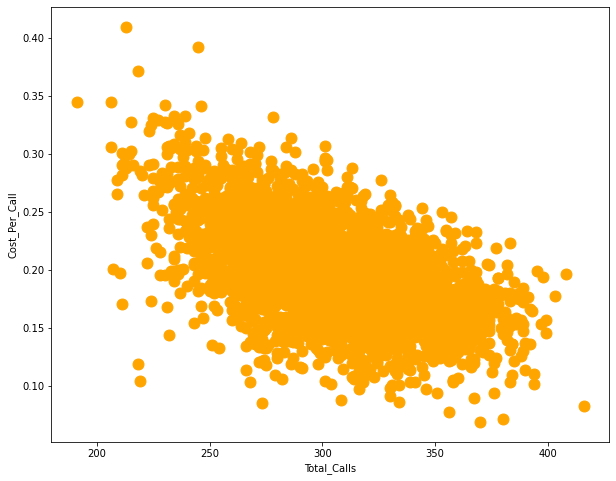

In [ ]:
# Create the first scatter plot
# Use the x-axis for number of calls
# Use the y-axis for the cost per call
# Label both axes
# play with plotting parameters (size, alpha, figure size, etc.) to make the plot more appealing
# make the figure size 10 x 8

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(
    x= orange['Total_Calls'],
    y= orange['Cost_Per_Call'], s= 120, color= 'orange' )
plt.xlabel('Total_Calls')
plt.ylabel('Cost_Per_Call')
plt.show()







**Double Click to Edit**

Answers

1. (Describe the relationship between calls and cost per call)
    1. Reason 1 : Number of calls made is directly proportional to the charges per call.
    1. Reason 2: Higher the duration of each call, higher  will be the total cost per call.

In [ ]:
orange.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls,Avg_Rate,Cost_Per_Call
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303,0.105354,0.249373
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332,0.094754,0.178434
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333,0.115480,0.187057
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255,0.118272,0.261961
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359,0.101738,0.145097


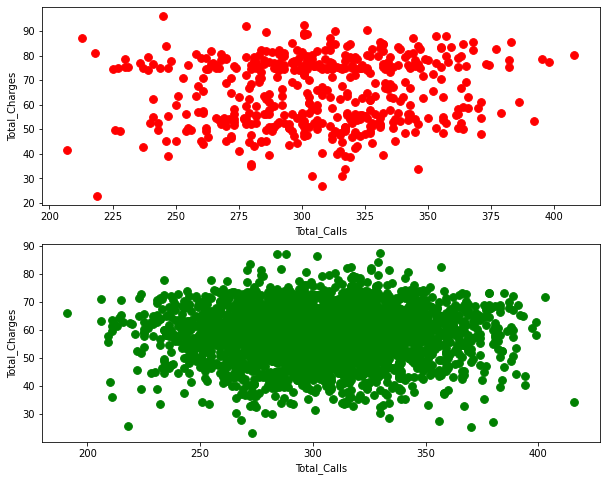

In [ ]:
## Create the second plot
# this figure requires making 2 plots on the same figure: one for churned, one for not 
# (e.g. select the rows that are churned (or not) and the appropriate column for the x and y values that go into the scatter plot function)
# Recall, you can select a subset of a particular column using the syntax: df.loc[conditions, 'column name']
# note the condition to select churned(not) customer should be orange.Churn == True (orange.Churn == False)

# make the churned group color red
# make the not churned group color green

# adjust the transparency, dot size, etc. to make the figure appealing
# CREATE A LEGEND, make sure the legend is legible
# make the figure size 10 x 8

churned = orange.loc[orange.Churn == True, ['Total_Calls', 'Total_Charges']]
not_churned = orange.loc[orange.Churn == False, ['Total_Calls', 'Total_Charges']]

fig, ax = plt.subplots(2, figsize=(10, 8))
ax[0].scatter(x = churned['Total_Calls'], y = churned['Total_Charges'], s= 60, color= 'red' )
ax[0].set_xlabel("Total_Calls")
ax[0].set_ylabel("Total_Charges")

ax[1].scatter(x = not_churned['Total_Calls'], y = not_churned['Total_Charges'], s=60,  color= 'green')
ax[1].set_xlabel("Total_Calls")
ax[1].set_ylabel("Total_Charges")

plt.show()

**Double Click to Edit**

Answers

1. (Describe what kind of customers are especially likely to churn)
    1. If the total charges of per call is high then the percentage of customers churn will be higher.